### Vector

In [1]:
height_weight_age = [70,  # inches,
                     170, # pounds,
                     30]  # years
grades = [95, # exam1
          80, # exam2
          75, # exam3
          62] # exam4

In [2]:
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i
            for v_i, w_i in zip(v, w)]

def vector_subtract(v , w):
    """subtracts corresponding elements"""
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

vector_add((1,2),(2,1))

[3, 3]

In [3]:
# also currying version
from functools import partial

def vector_elem_wise_oper(v, w, f):
    return [f(v_i, w_i)
            for v_i, w_i in zip(v, w)]

vector_add_cur = partial(vector_elem_wise_oper, f=lambda a,b: a+b)
vector_sub_cur = partial(vector_elem_wise_oper, f=lambda a,b: a-b)
vector_sub_cur((1,2),(2,1))

[-1, 1]

In [4]:
def vector_sum(vectors):
    """sums all corresponding elements"""
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

vector_sum([(1,2),(2,1),(3,3)])

[6, 6]

In [5]:
from functools import reduce
def vector_sum(vectors):
    return reduce(vector_add_cur, vectors)

vector_sum([(1,2),(2,1),(3,3)])

[6, 6]

In [6]:
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

In [7]:
def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the
    ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [8]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

In [9]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

from math import sqrt

def magnitude(v):
    return sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_sub_cur(v, w))

def distance(v, w):
    return sqrt(squared_distance(v, w))

# or

def distance(v, w):
    return magnitude(vector_sub_cur(v, w))

distance((0.5, 1), (2,1))

1.5

### Matrices

In [10]:
# express to two-dimensional lists
# conventionally, use capital letters for matrices' name
A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]
B= [[1, 2],      # B has 3 rows and 2 columns
    [3, 4],
    [5, 6]]

In [11]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 # num of elements in row
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j]
            for A_i in A]

In [12]:
def make_matrix(num_rows, num_cols, entry_fn):
    """rerturns a num_rows x num_cols matrix
    whose (i,j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j)            # given i, create a list
             for j in range(num_cols)] # [enrty_fn(i, 0), ...]
            for i in range(num_rows)]  # create one list for each i

In [13]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [14]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [15]:
friendships[0][2] == 1
friendships[0][8] == 1
friendships[0][8] == friendships[8][0] # should be true

True

In [16]:
friends_of_five = [i
                   for i, is_friend in enumerate(friendships[5])
                   if is_friend]
friends_of_five

[4, 6, 7]

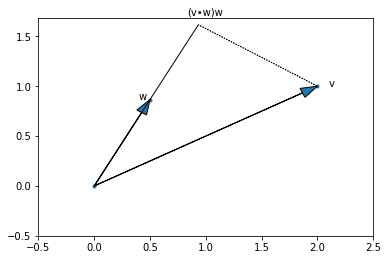

In [18]:
from matplotlib import pyplot as plt

v = [2, 1]
w = [sqrt(.25), sqrt(.75)]
c = dot(v, w)
vonw = scalar_multiply(c, w)
o = [0,0]

def draw_arrow(v, w, width=0, head_width=0, ls="solid"):
    plt.arrow(v[0], v[1], w[0], w[1], 
              width=width, head_width=head_width, ls=ls,
              length_includes_head=True)
    
def draw_arrow_with_big_head(v):
    big_head_kwargs = {"width": 0.002, "head_width": .1}
    draw_arrow(o, v, **big_head_kwargs)
    
def draw_projection(v, w):
    draw_arrow(v, vector_sub_cur(w, v), ls="dotted")
    
draw_arrow_with_big_head(v)
plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
draw_arrow_with_big_head(w)
plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
draw_arrow(o, vonw)
plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
draw_projection(v, vonw)
plt.scatter(*zip(v,w,o),marker='.')
plt.yticks([i * .5 for i in range(-1, 4)])
plt.axis([-.5, 2.5, -.5, 1.68])
plt.show()